<a href="https://colab.research.google.com/github/Hion-cy/ClassFiles/blob/main/PracticaReduccionNumerosida_AL263158d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ==========================================================================
# 📝 Tarea: Reducción de la Numerosidad con CNN, ENN y K-medias usando SVM
# 📊 Dataset: Breast Cancer (Scikit-Learn)
# 👤 Autor/a: Carmen Yolanda Hion Vela
# 📅 Fecha: 17/11/2025 ==========================================================================

## 🔍 Descripción:
En este cuaderno aplicarás técnicas de reducción de la numerosidad (CNN, ENN, K-medias) al conjunto de datos Breast Cancer y analizarás su efecto en el rendimiento de un modelo SVM.

## ==========================================================================

## 1. Cargar librerías necesarias
Escribe aquí la importación de librerías: numpy, pandas, matplotlib, seaborn, sklearn (datasets, model_selection, preprocessing, metrics, svm, kmeans), etc.

En el caso de los códigos de ENN, CNN, estos  deberás tomarlos del cuaderno que contiene la teoría y ejemplos.

In [74]:
#1. Cargar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold, cross_val_predict
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.utils.validation import check_X_y
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import random
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline

# --------------------------------------------------------------------------

## 2. Cargar y explorar el conjunto de datos Breast Cancer
- Cargar el dataset con sklearn.datasets.load_breast_cancer
- Explora las dimensiones, variables, y distribución de clases

In [13]:
#2. Cargar y explorar el conjunto de datos Breast Cancer
df_or = load_breast_cancer()
df=pd.DataFrame(df_or.data, columns=df_or.feature_names)
df['target'] = df_or.target

#print(df.head())
print("Dimensiones")
print(df.shape)

print("\nVariables")
print(df.dtypes)

print("\nDistribución de clases")
print(df['target'].value_counts())

Dimensiones
(569, 31)

Variables
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points  

# --------------------------------------------------------------------------

## 3. Preprocesamiento
 - Escalamiento de características (StandardScaler)
 - División del conjunto en entrenamiento y prueba
 - usar hold-out de 70% y 30%



In [34]:
# 3. Preprocesamiento
X = df.drop('target', axis=1)
y = df['target']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(f"Instancias originales (Conjunto completo): {len(y)}")
print(f"Instancias tras escalamiento: {len(X_scaled)}")
print("-" * 35)
print(f"Instancias de Entrenamiento (70%): {len(y_train)}")
print(f"Instancias de Prueba (30%): {len(y_test)}")

Instancias originales (Conjunto completo): 569
Instancias tras escalamiento: 569
-----------------------------------
Instancias de Entrenamiento (70%): 398
Instancias de Prueba (30%): 171


# --------------------------------------------------------------------------

## 4. Aplicar técnica CNN (Condensed Nearest Neighbor)

- Aplicar CNN sobre el conjunto de entrenamiento
- Mostrar el tamaño del conjunto reducido



In [29]:
#4. Aplicar técnica CNN (Condensed Nearest Neighbor)
class CNN:

    def __init__(self, n_neighbors=1):
        self.n_neighbors = n_neighbors
        self.classifier = KNeighborsClassifier(n_neighbors=self.n_neighbors)
        self.sample_indices_ = []

    def select_data(self, X, y):
        # Validación de entrada: datos densos
        X, y = check_X_y(X, y, accept_sparse=False)

        idx_s = []  # índice de instancias seleccionadas
        classes = np.unique(y)
        self.classes_ = classes

        # Iniciar con una instancia aleatoria por clase
        for cur_class in classes:
            mask = np.where(y == cur_class)[0]
            choose_id = random.choice(mask)
            idx_s.append(choose_id)

        # Revisión aleatoria del resto de las instancias
        train_idx = list(range(len(y)))
        random.shuffle(train_idx)

        flag = True
        while flag:
            flag = False
            self.classifier.fit(X[idx_s], y[idx_s])
            for idx in train_idx:
                if idx not in idx_s:
                    x_i = X[idx].reshape(1, -1)
                    if self.classifier.predict(x_i) != [y[idx]]:
                        idx_s.append(idx)
                        self.classifier.fit(X[idx_s], y[idx_s])
                        flag = True

        self.X_ = X[idx_s]
        self.y_ = y[idx_s]
        self.sample_indices_ = sorted(idx_s)
        self.reduction_ = 1.0 - len(self.y_) / len(y)
        return self.X_, self.y_

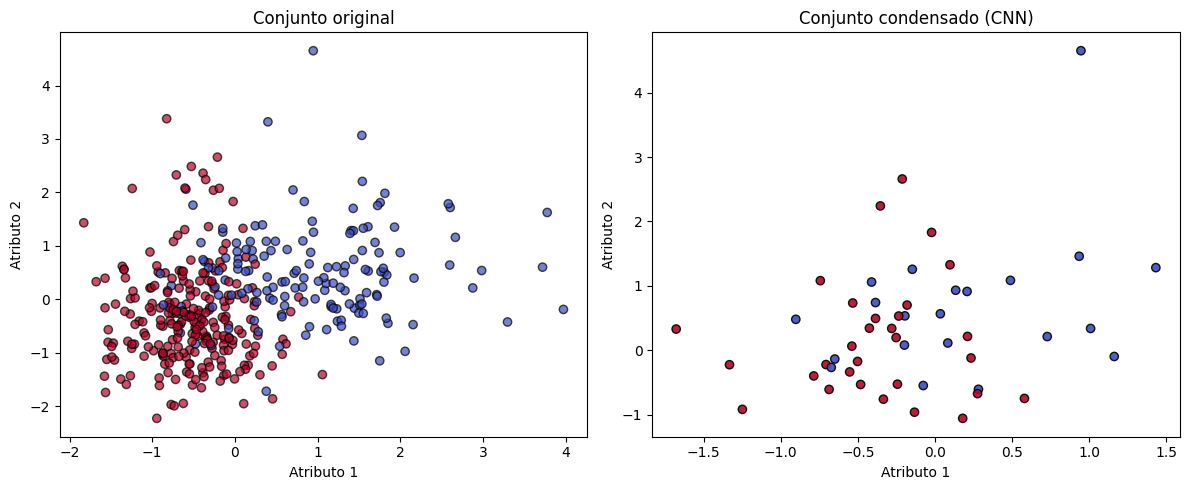

Instancias originales: 398
Instancias tras CNN:   51
Reducción: 87.19%


In [35]:

# Aplicar CNN
cnn = CNN(n_neighbors=1)
X_cnn, y_cnn = cnn.select_data(X_train, y_train)

# Visualización
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.values, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title("Conjunto original")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")

plt.subplot(1, 2, 2)
plt.scatter(X_cnn[:, 0], X_cnn[:, 1], c=y_cnn, cmap='coolwarm', edgecolor='k', alpha=0.9)
plt.title("Conjunto condensado (CNN)")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")

plt.tight_layout()
plt.show()

print(f"Instancias originales: {len(y_train)}")
print(f"Instancias tras CNN:   {len(y_cnn)}")
print(f"Reducción: {100 * cnn.reduction_:.2f}%")

 --------------------------------------------------------------------------

## 5. Aplicar técnica ENN (Edited Nearest Neighbor)

- Aplicar ENN sobre el conjunto de entrenamiento
- Mostrar el tamaño del conjunto reducido



In [39]:
# 5. Aplicar técnica ENN (Edited Nearest Neighbor)


class ENN:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        self.classifier = KNeighborsClassifier(n_neighbors=self.n_neighbors)
        self.sample_indices_ = []

    def fit(self, X, y):
        # Validación inicial
        X, y = check_X_y(X, y, accept_sparse=False)

        mask = np.ones(len(y), dtype=bool)
        tmp_m = np.ones(len(y), dtype=bool)

        indices = list(range(len(y)))
        random.shuffle(indices)

        for i in indices:
            tmp_m[i] = False
            self.classifier.fit(X[tmp_m], y[tmp_m])
            x_i = X[i].reshape(1, -1)
            y_pred = self.classifier.predict(x_i)
            if y_pred[0] != y[i]:
                mask[i] = False
            tmp_m[i] = True

        self.X_ = X[mask]
        self.y_ = y[mask]
        self.sample_indices_ = np.where(mask)[0]
        self.reduction_ = 1 - len(self.y_) / len(y)
        return self


Original: 398 muestras
Limpio:   384 muestras


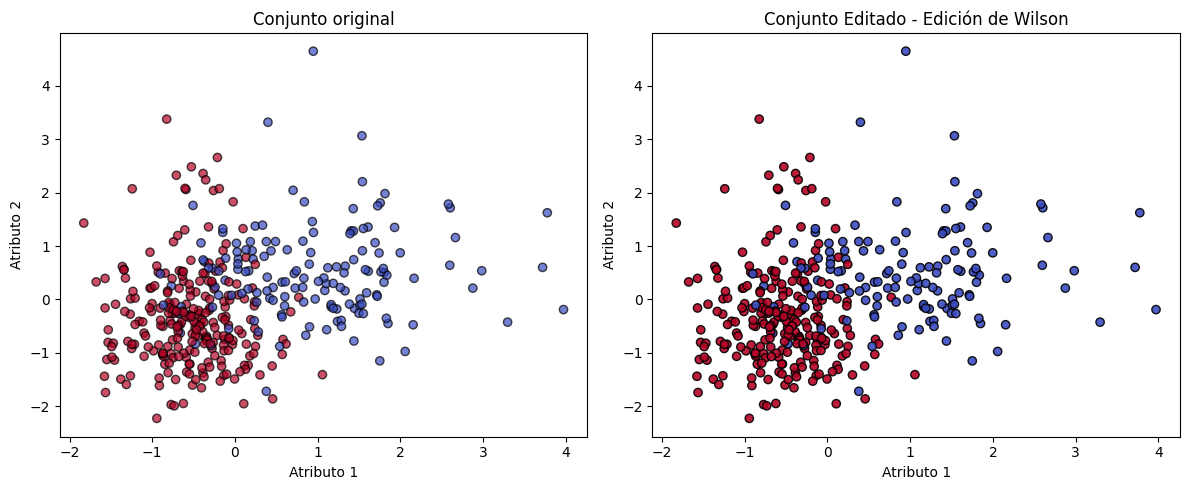

In [56]:

# Aplicar ENN
selector = ENN(n_neighbors=5)
selector.fit(X_train, y_train)

# Seleccionar subconjunto
idx = selector.sample_indices_
X_clean, y_clean = X_train[idx],y_train.iloc[idx].values


print(f"Original: {len(y_train)} muestras")
print(f"Limpio:   {len(y_clean)} muestras")


# Visualización
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.values, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title("Conjunto original")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")

plt.subplot(1, 2, 2)
plt.scatter(X_clean[:, 0], X_clean[:, 1], c=y_clean, cmap='coolwarm', edgecolor='k', alpha=0.9)
plt.title("Conjunto Editado - Edición de Wilson")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")

plt.tight_layout()
plt.show()


# --------------------------------------------------------------------------

## 6. Aplicar reducción mediante K-medias
- Realizar agrupamiento por clase y representar cada grupo con su centroide. Elige la mitad de los elementos de cada clase como el valor del número de centroides
- Generar un nuevo conjunto reducido con los centroides como prototipos



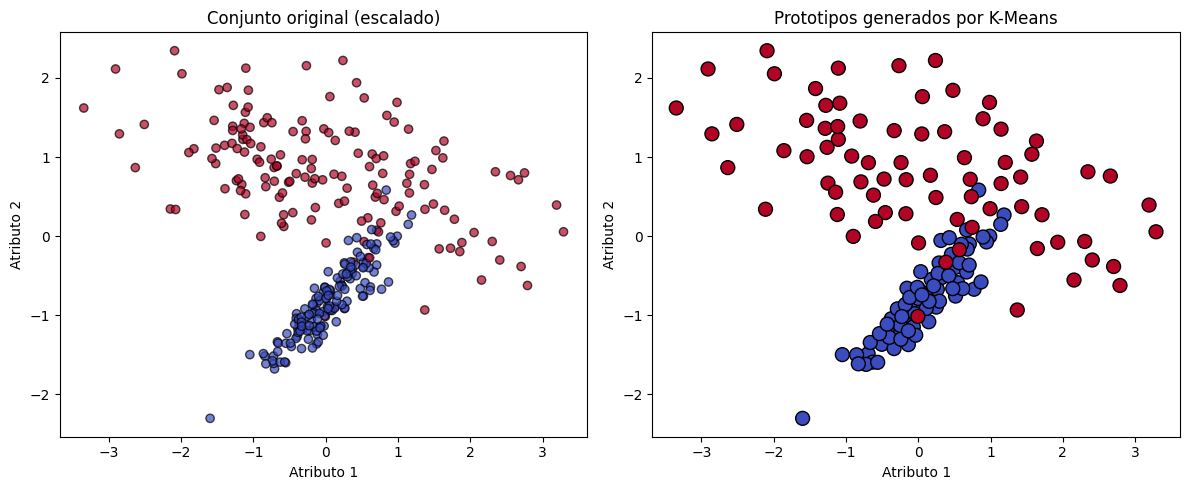

Instancias originales: 300
Instancias tras K-medias (Prototipos): 150


In [60]:
# 6. Aplicar reducción mediante K-medias

# 1. Generar conjunto de datos sintético
X, y = make_classification(n_samples=300, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           class_sep=1.0, random_state=42)

# 2. Escalar los datos para mejor desempeño de KMeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aquí puedes modificar el número de instancias por clase
# 3. Número de prototipos por clase

classes = np.unique(y)

# 4. Aplicar KMeans por clase
prototypes = []
labels = []

for c in classes:
    # Subconjunto de la clase actual

    class_data = X_scaled[y == c]
    prototypes_per_class = int(len(class_data) / 2)
    # KMeans sobre los datos de la clase
    kmeans = KMeans(n_clusters=prototypes_per_class, random_state=42)
    kmeans.fit(class_data)

    # Guardar prototipos y sus etiquetas
    prototypes.append(kmeans.cluster_centers_)
    labels.extend([c] * prototypes_per_class)

# 5. Concatenar resultados
X_proto = np.vstack(prototypes)
y_proto = np.array(labels)

# 6. Visualización
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Conjunto original
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
axes[0].set_title("Conjunto original (escalado)")
axes[0].set_xlabel("Atributo 1")
axes[0].set_ylabel("Atributo 2")

# Prototipos generados
axes[1].scatter(X_proto[:, 0], X_proto[:, 1], c=y_proto, cmap='coolwarm', edgecolor='k', s=100)
axes[1].set_title("Prototipos generados por K-Means")
axes[1].set_xlabel("Atributo 1")
axes[1].set_ylabel("Atributo 2")

plt.tight_layout()
plt.show()

print(f"Instancias originales: {len(y)}")
print(f"Instancias tras K-medias (Prototipos): {len(y_proto)}")


 --------------------------------------------------------------------------

##7. Entrenar SVM sobre cada conjunto reducido
- Entrenar un modelo SVM (SVC) sobre:
 * los datos originales
 * datos reducidos con CNN
 * datos reducidos con ENN
 * datos reducidos con K-medias
- Evaluar cada modelo con accuracy, F1-score



Instancias (tain)  300
Accuracy promedio con cross_val_score: 0.9666666666666666
Accuracy promedio con cross_val_predict: 0.9666666666666667
F1-Score (cross_val_predict): 0.9666607396870553
Matriz de confusión:
 [[147   3]
 [  7 143]]


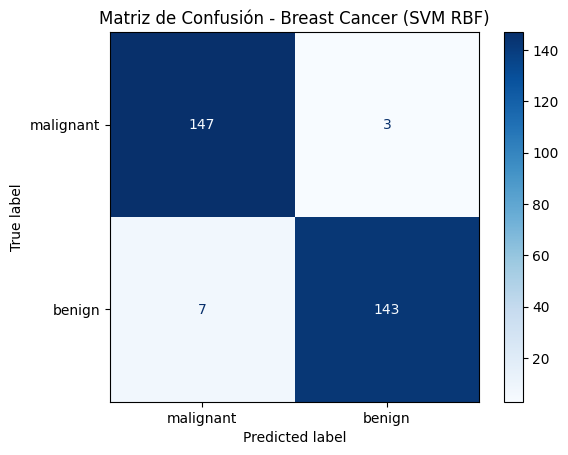

Instancias 300
Porcentaje de reduccion (Original): 0.00%


In [99]:
#7. Entrenar SVM sobre cada conjunto reducido
#SVM original
print(f"Instancias (tain)  {len(X)}")

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale'))
])

# Paso 4: Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Paso 5: Evaluación con Accuracy
accuracy_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
print("Accuracy promedio con cross_val_score:", np.mean(accuracy_scores))

# Paso 6: Predicción cruzada para accuracy y matriz de confusión
y_pred = cross_val_predict(pipeline, X, y, cv=cv)

# Accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy promedio con cross_val_predict:", accuracy)
f1 = f1_score(y, y_pred, average='weighted', zero_division=0)
print("F1-Score (cross_val_predict):", f1)
# Matriz de confusión
cm = confusion_matrix(y, y_pred)
print("Matriz de confusión:\n", cm)

# Obtener los nombres de las clases del dataset original
target_names = df_or.target_names

# Paso 7: Visualizar la matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Breast Cancer (SVM RBF)")
plt.grid(False)
plt.show()

n_original=len(X)
n_reducido=len(X)
porcentaje_reduccion_original = (1 - (n_reducido / n_original)) * 100
print(f"Instancias {len(X)}")
print(f"Porcentaje de reduccion (Original): {porcentaje_reduccion_original:.2f}%")

Accuracy promedio con cross_val_score: 0.7454545454545455
Accuracy promedio con cross_val_predict: 0.7450980392156863
F1-Score (cross_val_predict): 0.7440788390526143
Matriz de confusión:
 [[14  7]
 [ 6 24]]


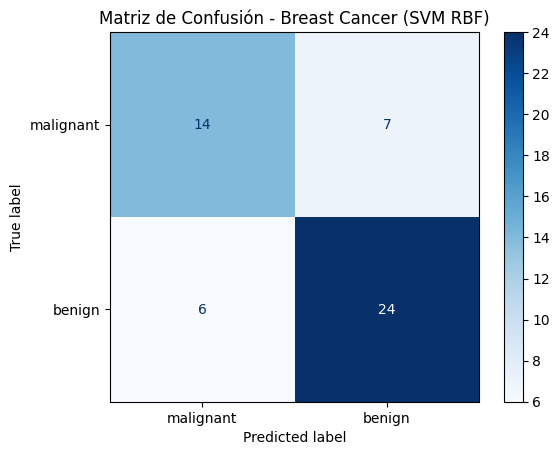

Instancias CNN 51
Porcentaje de reduccion (CNN): 83.00%


In [101]:
#SVM con datos CNN

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale'))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(pipeline, X_cnn, y_cnn, cv=cv, scoring='accuracy')
print("Accuracy promedio con cross_val_score:", np.mean(accuracy_scores))
y_pred = cross_val_predict(pipeline, X_cnn, y_cnn, cv=cv)
accuracy = accuracy_score(y_cnn, y_pred)
print("Accuracy promedio con cross_val_predict:", accuracy)
f1 = f1_score(y_cnn, y_pred, average='weighted', zero_division=0)
print("F1-Score (cross_val_predict):", f1)
cm = confusion_matrix(y_cnn, y_pred)
print("Matriz de confusión:\n", cm)

target_names = df_or.target_names

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Breast Cancer (SVM RBF)")
plt.grid(False)
plt.show()

n_original=len(X)
n_reducido=len(X_cnn)
porcentaje_reduccion_cnn = (1 - (n_reducido / n_original)) * 100
print(f"Instancias CNN {n_reducido}")
print(f"Porcentaje de reduccion (CNN): {porcentaje_reduccion_cnn:.2f}%")



Accuracy promedio con cross_val_score: 0.9895078605604921
Accuracy promedio con cross_val_predict: 0.9895833333333334
F1-Score (cross_val_predict): 0.9895833333333334
Matriz de confusión:
 [[135   2]
 [  2 245]]


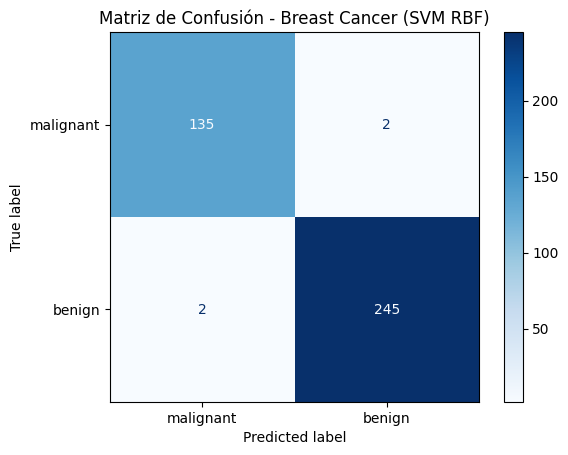

Instancias ENN 384
Porcentaje de reduccion (ENN): -28.00%


In [102]:
#SVM con ENN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale'))
])
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(pipeline, X_clean, y_clean, cv=cv, scoring='accuracy')
print("Accuracy promedio con cross_val_score:", np.mean(accuracy_scores))
y_pred = cross_val_predict(pipeline, X_clean, y_clean, cv=cv)
accuracy = accuracy_score(y_clean, y_pred)
print("Accuracy promedio con cross_val_predict:", accuracy)
f1 = f1_score(y_clean, y_pred, average='weighted', zero_division=0)
print("F1-Score (cross_val_predict):", f1)
cm = confusion_matrix(y_clean, y_pred)
print("Matriz de confusión:\n", cm)

target_names = df_or.target_names

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Breast Cancer (SVM RBF)")
plt.grid(False)
plt.show()

n_original=len(X)
n_reducido=len(X_clean)
porcentaje_reduccion_enn = (1 - (n_reducido / n_original)) * 100
print(f"Instancias ENN {n_reducido}")
print(f"Porcentaje de reduccion (ENN): {porcentaje_reduccion_enn:.2f}%")

Accuracy promedio con cross_val_score: 0.9400000000000001
Accuracy promedio con cross_val_predict: 0.94
F1-Score (cross_val_predict): 0.9399332591768632
Matriz de confusión:
 [[73  2]
 [ 7 68]]


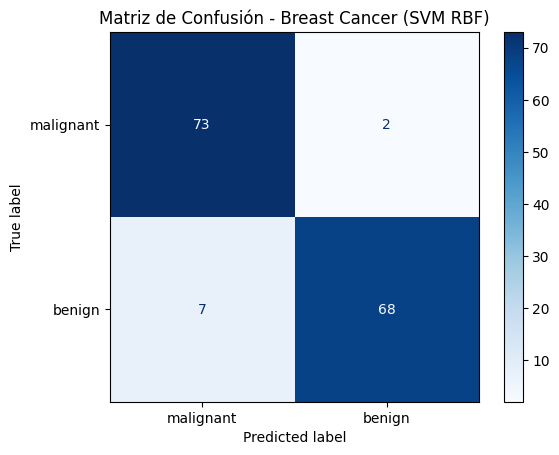

Instancias K-Medias 150
Porcentaje de reduccion (K-Medias): 50.00%


In [103]:
#svm kmedias
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale'))
])
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(pipeline, X_proto, y_proto, cv=cv, scoring='accuracy')
print("Accuracy promedio con cross_val_score:", np.mean(accuracy_scores))
y_pred = cross_val_predict(pipeline, X_proto, y_proto, cv=cv)
accuracy = accuracy_score(y_proto, y_pred)
print("Accuracy promedio con cross_val_predict:", accuracy)
f1 = f1_score(y_proto, y_pred, average='weighted', zero_division=0)
print("F1-Score (cross_val_predict):", f1)
cm = confusion_matrix(y_proto, y_pred)
print("Matriz de confusión:\n", cm)

target_names = df_or.target_names

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Breast Cancer (SVM RBF)")
plt.grid(False)
plt.show()
n_original=len(X)
n_reducido=len(X_proto)
porcentaje_reduccion_kmedias = (1 - (n_reducido / n_original)) * 100
print(f"Instancias K-Medias {n_reducido}")
print(f"Porcentaje de reduccion (K-Medias): {porcentaje_reduccion_kmedias:.2f}%")

# --------------------------------------------------------------------------

## 📊 8. Comparar los resultados y reflexión final
- Comparar las métricas de rendimiento obtenidas con cada técnica
| Escenario de Entrenamiento | N Instancias (Train) | % Reducción | Accuracy (CV) | F1-Score (CV) |
| :--- | :--- | :--- | :--- | :--- |
| **Original (Línea Base)** | 300 | 0.00% | 0.9667 | 0.9667 |
| **Editado por ENN** | 384 | -28.00% | **0.9895** | **0.9896** |
| **Reducido por K-Medias** | 150 | 50.00% | 0.9400 | 0.9399 |
| **Reducido por CNN** | 51 | 83.00% | 0.7455 | 0.7441 |

- Escribe tus conclusiones sobre el impacto de la reducción de la numerosidad

**Condensación busca eficiencia, mientras que edición busca calidad. Las técnicas de condensación  como CNN, no son completamente efectivas, pues la reducción del 83% puede eliminar información crítica, resultando en una baja precisión. K-Medias, sin embargo, logra una reduccion mas pequeña del 50% con una mínima pérdida. Por otro lado, la técnica de edición (ENN) muestra  una mejora en la precisión sin comprometer la informacion, al contrario, en lugar de reducir, se puede decir que aumenta los numeros de datos.**


- ¿Cuál técnica funcionó mejor? ¿Qué ventajas y desventajas observaste?

**Basándonos en los resultados de la tabla podemos observar que la tecnica de ENN es notablemente la mejor opcion. No reduce el numero de instancias y las estadisticas de precision (accuracy) y F1 son las mas altas entre todas las tecnicas utilizadas.Sin embargo las desventajas de usar este metodo reside presisamente en el aumento de la numerosidad de 300 a 384, que si bien mejora los resultados, profriamos estar comprometiendo el rendimiento del modelo.**


**Sí además tomamos en cuenta el rendimiento y por ello descartaramos ENN, la siguiente mejor opcion es K-medias, que si, compromete el 50% de los datos, pero la precision y el puntaje de F1 se mantienen por encima del 90% (que es una desventaja a comparacion de ENN) sin comprometer el rendimiento computacional.**